##Your exercise

Go back to <font color=00ffff>Advanced Topic: Image augmentation test script</font> in section **2. The data**, and do a self-learning under the lecturer's supervision to re-plot the evaluation curves for comparison with the old ones. rorganize your code blocks, including with text blocks if it is necessary, below this line.

---

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -O '/tmp/rps.zip'                           # rps.zip : training dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -O '/tmp/rps-test-set.zip'   # rps-test-set.zip : test dataset
!ls -al /tmp

# Exploring the data
import zipfile
WORK_DIR ='/tmp'         # set your destination working (data path) directory here
def extractFile(WORK_DIR): 
  print('Extracring all zip files to ' + WORK_DIR + '/tmp') 
  local_zip = WORK_DIR + '/rps.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall(WORK_DIR + '/tmp')
  zip_ref.close()

  local_zip = WORK_DIR + '/rps-test-set.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall(WORK_DIR + '/tmp')
  zip_ref.close()
  print('WARNING: Do not forget to disable me extractFile() after first use (call)!!')

extractFile(WORK_DIR)                # The following line shoule be first run, only ONCE

print('zipfile imported..')
print('\t>>Warning: Bofore proceeding to the next code block,\n\t  do not forget to configure your WORK_DIR //data// path..')


# 
import os
# traning dataset directory
rock_dir = os.path.join(WORK_DIR + '/tmp/rps/rock')
paper_dir = os.path.join(WORK_DIR + '/tmp/rps/paper')
scissors_dir = os.path.join(WORK_DIR +'/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:5])                    # รายชื่อ 5 ไฟล์แรก

paper_files = os.listdir(paper_dir)
print(paper_files[:5])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:5])
print('Done..')

--2020-05-08 14:00:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  57.8MB/s    in 3.3s    

2020-05-08 14:01:02 (57.8 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-05-08 14:01:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [0]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

TRAINING_DIR = '/tmp/tmp/rps'

##########################################################
# Preparing the training data without augmentation
training_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)

VALIDATION_DIR = '/tmp/tmp/rps-test-set'
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)
print('Testing data, DONE..')

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

history1 = model.fit_generator(train_generator, epochs=25, steps_per_epoch=20,
                              validation_data = validation_generator, 
                              verbose = 1, validation_steps=3)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Testing data, DONE..
Epoch 1/25
20/20 [==============================] - 3s 143ms/step - loss: 1.5458 - accuracy: 0.4000 - val_loss: 1.0536 - val_accuracy: 0.5625
Epoch 2/25
20/20 [==============================] - 3s 142ms/step - loss: 0.7263 - accuracy: 0.6969 - val_loss: 0.5731 - val_accuracy: 0.8750
Epoch 3/25
20/20 [==============================] - 3s 132ms/step - loss: 0.3732 - accuracy: 0.8891 - val_loss: 1.0336 - val_accuracy: 0.6875
Epoch 4/25
20/20 [==============================] - 3s 133ms/step - loss: 0.1169 - accuracy: 0.9684 - val_loss: 0.7956 - val_accuracy: 0.7812
Epoch 5/25
20/20 [==============================] - 3s 137ms/step - loss: 0.1412 - accuracy: 0.9609 - val_loss: 1.0998 - val_accuracy: 0.8229
Epoch 6/25
20/20 [==============================] - 3s 132ms/step - loss: 0.0602 - accuracy: 0.9812 - val_loss: 0.6636 - val_accuracy: 0.7917
Epoch 7/25
20/20 [==========================

In [0]:
# Preparing the training data with augmentation
training_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

VALIDATION_DIR = '/tmp/tmp/rps-test-set'
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150, 150),
    class_mode = 'categorical'
)


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy'])

# Fitting model
history2 = model.fit_generator(train_generator, epochs=25, steps_per_epoch=20,
                              validation_data = validation_generator, 
                              verbose = 1, validation_steps=3)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/25
20/20 [==============================] - 6s 295ms/step - loss: 1.5895 - accuracy: 0.3500 - val_loss: 1.0903 - val_accuracy: 0.4688
Epoch 2/25
20/20 [==============================] - 6s 289ms/step - loss: 1.1050 - accuracy: 0.3391 - val_loss: 1.1112 - val_accuracy: 0.2500
Epoch 3/25
20/20 [==============================] - 6s 287ms/step - loss: 1.1029 - accuracy: 0.3500 - val_loss: 1.1024 - val_accuracy: 0.2083
Epoch 4/25
20/20 [==============================] - 6s 281ms/step - loss: 1.1042 - accuracy: 0.3703 - val_loss: 1.0892 - val_accuracy: 0.5208
Epoch 5/25
20/20 [==============================] - 6s 287ms/step - loss: 1.0945 - accuracy: 0.4125 - val_loss: 1.0675 - val_accuracy: 0.4375
Epoch 6/25
20/20 [==============================] - 6s 283ms/step - loss: 1.0719 - accuracy: 0.4156 - val_loss: 0.9542 - val_accuracy: 0.5625
Epoch 7/25
20/20 [==============================] - 6s 283ms/step

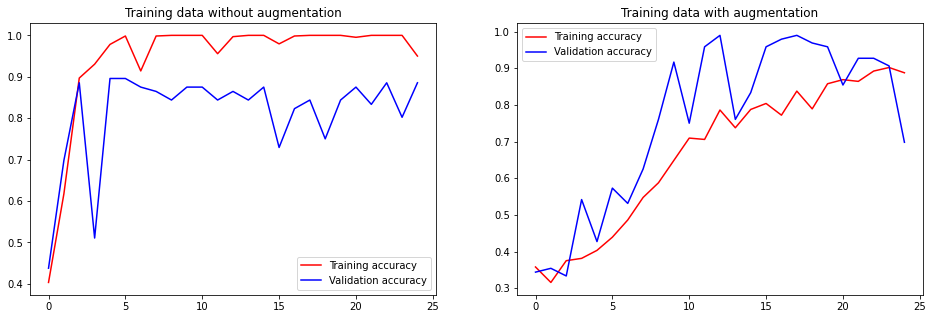

In [0]:
#To compare training data without and with augmentation
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(epochs, acc1, 'r', label='Training accuracy')
plt.plot(epochs, val_acc1, 'b', label='Validation accuracy')
plt.title('Training data without augmentation')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training data with augmentation')
plt.legend(loc=0)
plt.show()